IMPORTING LIBRARIES:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
churn=pd.read_csv('Churn_Modelling.csv')

In [ ]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


EXPLORATORY DATA ANALYSIS:

In [ ]:
print('Shape:',churn.shape)
print('Shape:',churn.size)
churn.columns=churn.columns.str.strip()
churn.columns=churn.columns.str.lower()
churn.columns

Shape: (10000, 14)
Shape: 140000


Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [ ]:
churn.isnull().sum()

rownumber          0
customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

In [ ]:
churn[churn.duplicated(subset=['customerid'],keep=False)]

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited


In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           10000 non-null  int64  
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
churn.describe()

,rownumber,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<Axes: xlabel='exited', ylabel='count'>

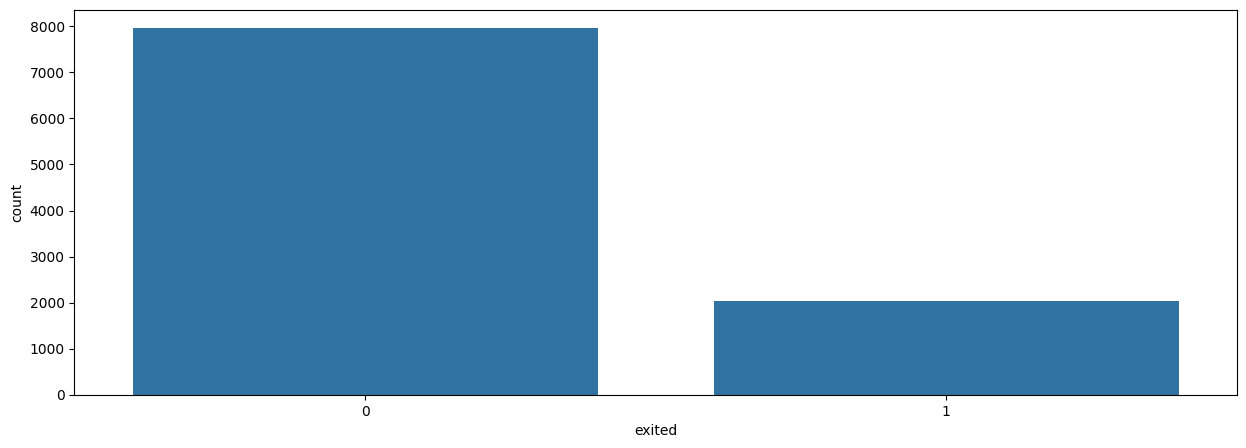

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data=churn,x='exited')

In [ ]:
churn['exited'].value_counts().to_frame()

,count
exited,
0,7963
1,2037


In [ ]:
from sklearn.utils import resample
churn_majority=churn[churn['exited']==0]
churn_minority=churn[churn['exited']==1]
churn_majority_downsample=resample(churn_majority,n_samples=2037,replace=False,random_state=42)
churn_df=pd.concat([churn_majority_downsample,churn_minority])
churn_df['exited'].value_counts().to_frame()

,count
exited,
0,2037
1,2037


<Axes: xlabel='exited', ylabel='count'>

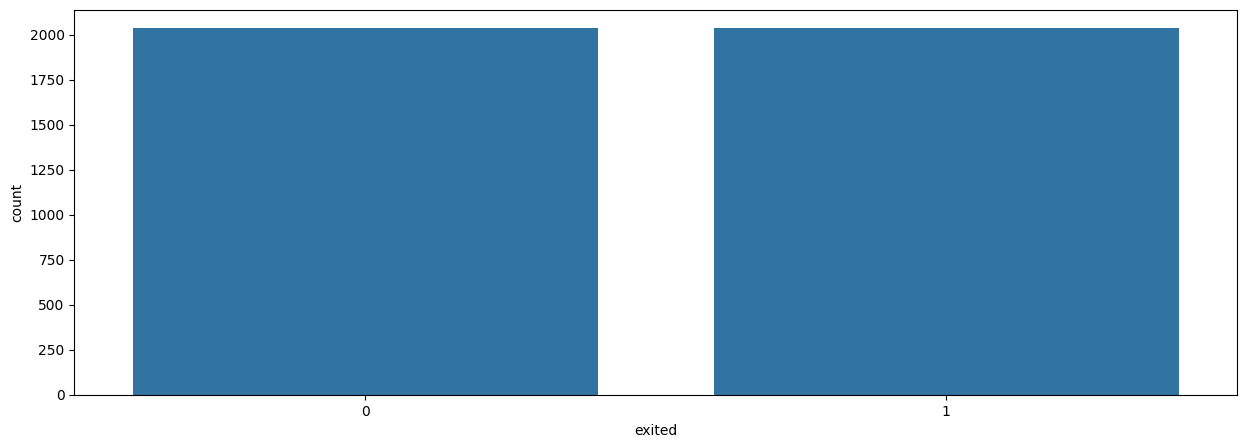

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data=churn_df,x='exited')

In [ ]:
churn_df.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [ ]:
churn_df.drop(['rownumber', 'customerid', 'surname','geography','gender'],axis=1,inplace=True)
churn_df.corr()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
creditscore,1.000000,-0.019635,0.019156,0.022088,0.007916,0.002756,0.012992,-0.010973,-0.034660
age,-0.019635,1.000000,-0.029303,0.040785,-0.031884,-0.031115,0.016498,0.006669,0.343870
tenure,0.019156,-0.029303,1.000000,0.006340,0.019054,0.018600,-0.032413,0.025749,-0.016491
balance,0.022088,0.040785,0.006340,1.000000,-0.189561,-0.008388,-0.025617,0.001774,0.146820
numofproducts,0.007916,-0.031884,0.019054,-0.189561,1.000000,-0.008130,0.037570,0.008241,-0.054669
hascrcard,0.002756,-0.031115,0.018600,-0.008388,-0.008130,1.000000,-0.031892,-0.024178,-0.017800
isactivemember,0.012992,0.016498,-0.032413,-0.025617,0.037570,-0.031892,1.000000,-0.007396,-0.201877
estimatedsalary,-0.010973,0.006669,0.025749,0.001774,0.008241,-0.024178,-0.007396,1.000000,0.006173
exited,-0.034660,0.343870,-0.016491,0.146820,-0.054669,-0.017800,-0.201877,0.006173,1.000000


<Axes: >

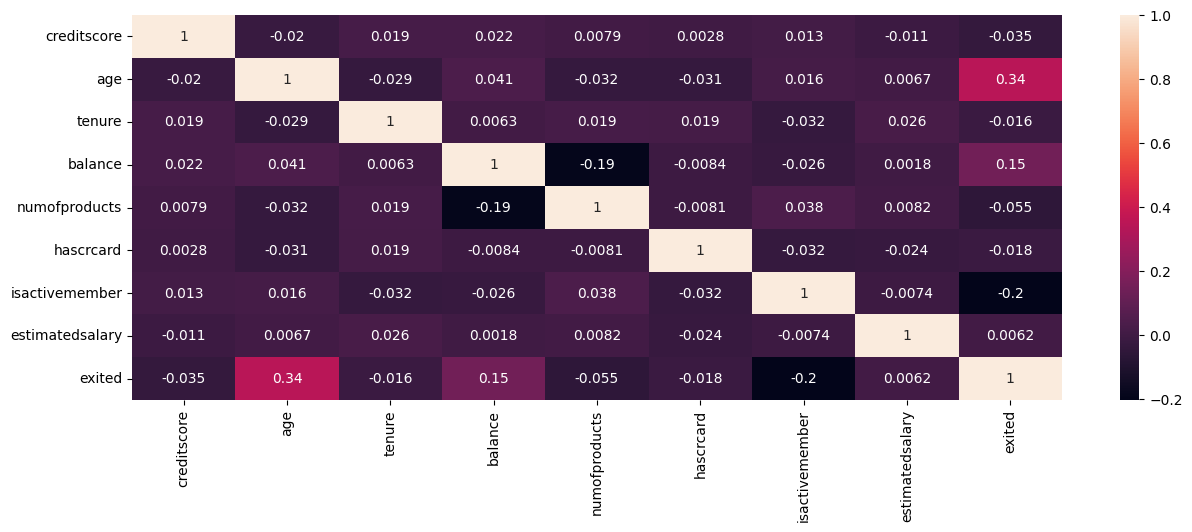

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(churn_df.corr(),annot=True)

<Axes: xlabel='None', ylabel='exited'>

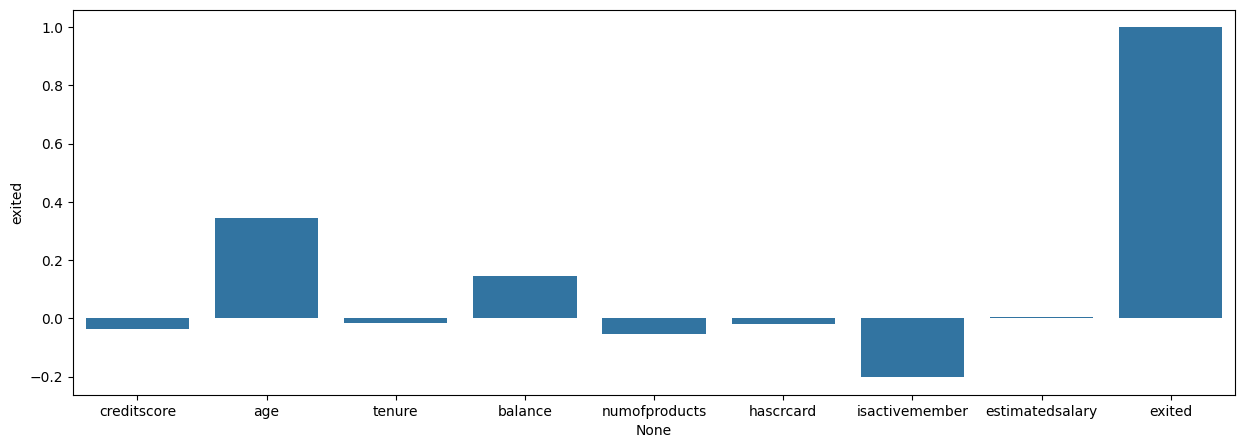

In [ ]:
df_corr_exit=churn_df.corr()['exited'].to_frame()
plt.figure(figsize=(15,5))
sns.barplot(data=df_corr_exit,x=df_corr_exit.index,y='exited')

In [ ]:
x=churn_df.drop(['exited'],axis=1)
y=churn_df['exited']

MODEL TRAINING:

In [ ]:
#Splitting the data:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2851, 8), (1223, 8), (2851,), (1223,))

1. Logistic Regression:

Logistic Regression Training Accuracy: 66.363%
Logistic Regression Precision: 0.620
Logistic Regression Recall: 0.700
Logistic Regression Accuracy: 65.249%
Logistic Regression F1 Score: 0.658

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.69      0.61      0.65       640
           1       0.62      0.70      0.66       583

    accuracy                           0.65      1223
   macro avg       0.66      0.65      0.65      1223
weighted avg       0.66      0.65      0.65      1223



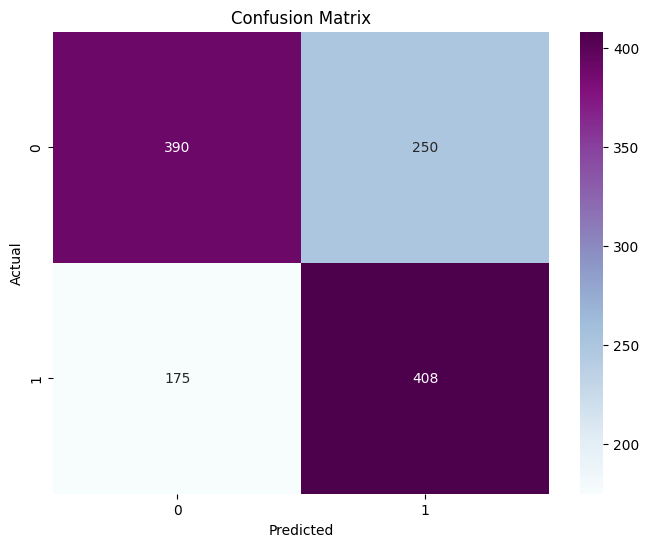

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Train Logistic Regression model
lr = LogisticRegression(max_iter=500)
lr.fit(x_train, y_train)

# Print the training score
train_score = lr.score(x_train, y_train)
print("Logistic Regression Training Accuracy: {:.3f}%".format(train_score * 100))

# Make predictions on test data
y_pred = lr.predict(x_test)

# Calculate evaluation metrics on test data
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Logistic Regression Precision: {:.3f}".format(precision))
print("Logistic Regression Recall: {:.3f}".format(recall))
print("Logistic Regression Accuracy: {:.3f}%".format(accuracy * 100))
print("Logistic Regression F1 Score: {:.3f}".format(f1))

# Generate and print classification report
classification_rep = classification_report(y_test, y_pred, digits=2)
print("\nClassification Report for Logistic Regression:")
print(classification_rep)

# Calculate and plot confusion matrix with a different colormap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuPu')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


2.RANDOM FOREST:

Random Forest Training Accuracy: 100.000%
Random Forest Precision: 0.745
Random Forest Recall: 0.708
Random Forest Accuracy: 74.571%
Random Forest F1 Score: 0.726

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.75      0.78      0.76       640
           1       0.75      0.71      0.73       583

    accuracy                           0.75      1223
   macro avg       0.75      0.74      0.74      1223
weighted avg       0.75      0.75      0.75      1223



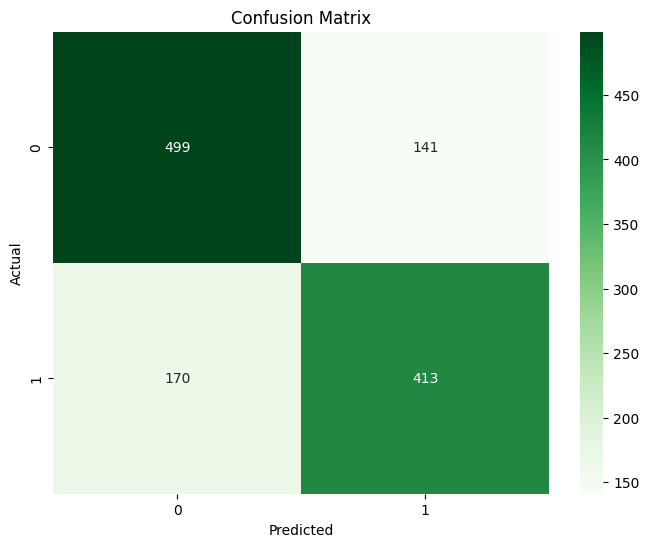

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train Random Forest model
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

# Print the training score
train_score = rf.score(x_train, y_train)
print("Random Forest Training Accuracy: {:.3f}%".format(train_score * 100))

# Make predictions on test data
y_pred = rf.predict(x_test)

# Calculate evaluation metrics on test data
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Random Forest Precision: {:.3f}".format(precision))
print("Random Forest Recall: {:.3f}".format(recall))
print("Random Forest Accuracy: {:.3f}%".format(accuracy * 100))
print("Random Forest F1 Score: {:.3f}".format(f1))

# Generate and print classification report
classification_rep = classification_report(y_test, y_pred, digits=2)
print("\nClassification Report for Random Forest:")
print(classification_rep)

# Calculate and plot confusion matrix with green shades colormap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Gradient Boosting Training Accuracy: 79.761%
Gradient Boosting Precision: 0.737
Gradient Boosting Recall: 0.731
Gradient Boosting Accuracy: 74.734%
Gradient Boosting F1 Score: 0.734

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       640
           1       0.74      0.73      0.73       583

    accuracy                           0.75      1223
   macro avg       0.75      0.75      0.75      1223
weighted avg       0.75      0.75      0.75      1223



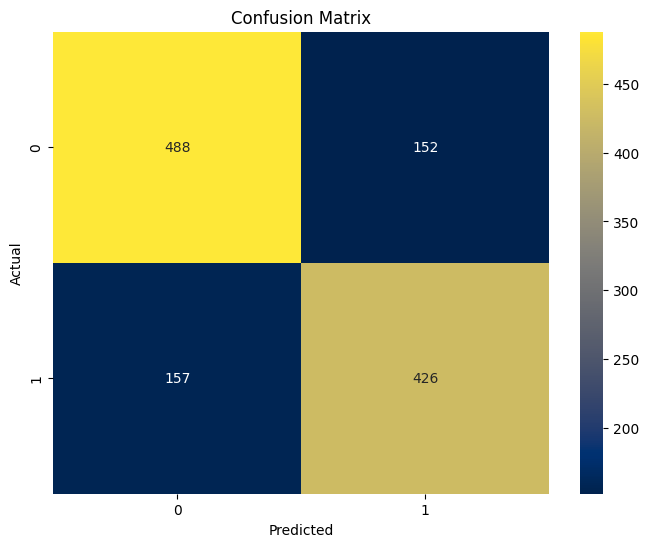

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train Gradient Boosting model
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

# Print the training score
train_score = gb.score(x_train, y_train)
print("Gradient Boosting Training Accuracy: {:.3f}%".format(train_score * 100))

# Make predictions on test data
y_pred = gb.predict(x_test)

# Calculate evaluation metrics on test data
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Gradient Boosting Precision: {:.3f}".format(precision))
print("Gradient Boosting Recall: {:.3f}".format(recall))
print("Gradient Boosting Accuracy: {:.3f}%".format(accuracy * 100))
print("Gradient Boosting F1 Score: {:.3f}".format(f1))

# Generate and print classification report
classification_rep = classification_report(y_test, y_pred, digits=2)
print("\nClassification Report for Gradient Boosting:")
print(classification_rep)

# Calculate and plot confusion matrix with beautiful colormap (cividis)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='cividis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


COMPARISON OF MODELS:

In [ ]:
# prompt: Compare the 3 models and display their details. Plot a graph showing the best one

models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting'],
    'Training Accuracy': [lr.score(x_train, y_train), rf.score(x_train, y_train), gb.score(x_train, y_train)],
    'Precision': [precision_score(y_test, lr.predict(x_test)), precision_score(y_test, rf.predict(x_test)), precision_score(y_test, gb.predict(x_test))],
    'Recall': [recall_score(y_test, lr.predict(x_test)), recall_score(y_test, rf.predict(x_test)), recall_score(y_test, gb.predict(x_test))],
    'Accuracy': [accuracy_score(y_test, lr.predict(x_test)), accuracy_score(y_test, rf.predict(x_test)), accuracy_score(y_test, gb.predict(x_test))],
    'F1 Score': [f1_score(y_test, lr.predict(x_test)), f1_score(y_test, rf.predict(x_test)), f1_score(y_test, gb.predict(x_test))]
})

models.style.background_gradient(cmap='Blues')




,Model,Training Accuracy,Precision,Recall,Accuracy,F1 Score
0,Logistic Regression,0.663627,0.620061,0.699828,0.652494,0.657534
1,Random Forest,1.000000,0.745487,0.708405,0.745707,0.726473
2,Gradient Boosting,0.797615,0.737024,0.730703,0.747343,0.733850


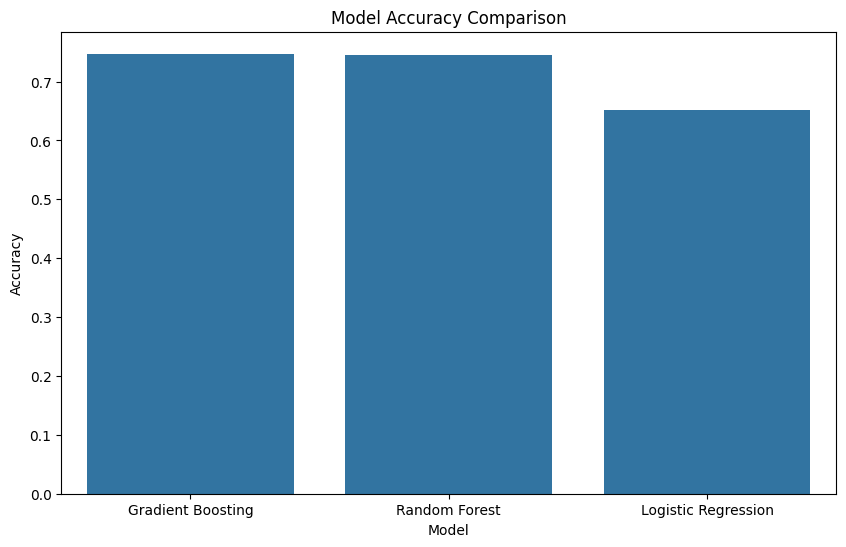

In [ ]:
# Plot a bar chart to compare the accuracy of different models
models_accuracy = models.sort_values(by='Accuracy', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=models_accuracy)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()